## **TASK 1 - DATA PREPROCESSING**

In [ ]:
import pandas as pd

In [ ]:
Gender = pd.read_csv("/content/drive/MyDrive/INTERNSHIP/TECHNOHACKS/gender_submission.csv")

In [ ]:
Gender.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [ ]:
Gender.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [ ]:
Gender.sample(5)

,PassengerId,Survived
205,1097,0
366,1258,0
179,1071,1
38,930,0
161,1053,0


In [ ]:
Gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


# **REMOVING MISSING VALUES**

In [ ]:
Gender.isnull()

,PassengerId,Survived
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
413,False,False
414,False,False
415,False,False
416,False,False


In [ ]:
new_gen = Gender.dropna()
print(new_gen.to_string())

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
30           922         0
31           923         0
32           924         1
33           925         1
34           926         0
35           927         0
3

In [ ]:
new_gen.drop_duplicates(inplace=True)

# **REMOVING OUTLIERS**

In [ ]:
def remove_outliers(Gender, column_name):
    q1 = Gender[column_name].quantile(0.25)
    q3 = Gender[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    Gender = Gender[(Gender[column_name] >= lower_bound) & (Gender[column_name] <= upper_bound)]
    return Gender


titanic_data = remove_outliers(new_gen, 'PassengerId')
titanic_data = remove_outliers(new_gen, 'Survived')

## **TASK 2**  **CALCULATING** **STATISTICS**

In [ ]:
statics = new_gen.describe()

In [ ]:
mode = new_gen.mode()

In [ ]:
statics.loc['mode'] = mode.iloc[0]

In [ ]:
print(statics)

       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000
mode    892.000000    0.000000


### **TASK 3** **VISUALIZATION**

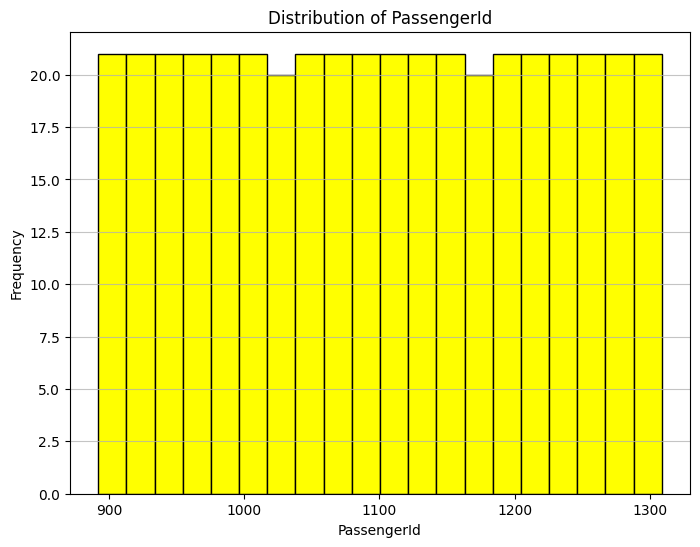

In [56]:
import matplotlib.pyplot as plt
new_gen = 'PassengerId'


plt.figure(figsize=(8, 6))
plt.hist(Gender[new_gen].dropna(), bins=20, color='yellow', edgecolor='black')
plt.xlabel(new_gen)
plt.ylabel('Frequency')
plt.title(f'Distribution of {new_gen}')
plt.grid(axis='y', alpha=0.75)


plt.show()


In [44]:
import plotly.express as px
figure = px.histogram(new_gen, x="PassengerId" , y="Survived" , title="PASSENGER ID WHOM SURVIVED")
figure.show()

In [45]:
figure = px.bar(new_gen , x="Survived" , title ="Survived Count" )
figure.show()